In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os

Nous téléchargeons les données hebdomadaires de CO2 dans l'atmosphère de l'observatoire du Mauna Loa Oberservatory. Le lien suggeré dans MOOC ne marcherait pas (le 11 kanvier 2024), donc cet site est utilisé.

In [3]:
if os.path.exists("co2_weekly_mlo.csv"):
    data_path = "co2_weekly_mlo.csv"
else:
    data_path = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_weekly_mlo.csv"

Nous omitterons les premières lignes car ils sont des commentaires.

In [24]:
co2_data = pd.read_csv(data_path, skiprows=35)
co2_data

year  month  day    decimal  average  ndays  1 year ago  10 years ago  \
0     1974      5   19  1974.3795   333.37      5     -999.99       -999.99   
1     1974      5   26  1974.3986   332.95      6     -999.99       -999.99   
2     1974      6    2  1974.4178   332.35      5     -999.99       -999.99   
3     1974      6    9  1974.4370   332.20      7     -999.99       -999.99   
4     1974      6   16  1974.4562   332.37      7     -999.99       -999.99   
5     1974      6   23  1974.4753   331.73      5     -999.99       -999.99   
6     1974      6   30  1974.4945   331.69      6     -999.99       -999.99   
7     1974      7    7  1974.5137   331.46      6     -999.99       -999.99   
8     1974      7   14  1974.5329   330.83      5     -999.99       -999.99   
9     1974      7   21  1974.5521   330.76      7     -999.99       -999.99   
10    1974      7   28  1974.5712   329.81      4     -999.99       -999.99   
11    1974      8    4  1974.5904   329.85      5     -999.99       -999.99   
12    1974      8   11  1974.6096   329.15      5     -999.99       -999.99   
13    1974      8   18  1974.6288   329.06      6     -999.99       -999.99   
14    1974      8   25  1974.6479   328.33      7     -999.99       -999.99   
15    1974      9    1  1974.6671   328.06      5     -999.99       -999.99   
16    1974      9    8  1974.6863   327.56      4     -999.99       -999.99   
17    1974      9   15  1974.7055   326.72      6     -999.99       -999.99   
18    1974      9   22  1974.7247   326.99      5     -999.99       -999.99   
19    1974      9   29  1974.7438   327.31      5     -999.99       -999.99   
20    1974     10    6  1974.7630   327.07      6     -999.99       -999.99   
21    1974     10   13  1974.7822   327.23      5     -999.99       -999.99   
22    1974     10   20  1974.8014   327.40      5     -999.99       -999.99   
23    1974     10   27  1974.8205   327.64      7     -999.99       -999.99   
24    1974     11    3  1974.8397   327.80      7     -999.99       -999.99   
25    1974     11   10  1974.8589   328.50      6     -999.99       -999.99   
26    1974     11   17  1974.8781   328.61      6     -999.99       -999.99   
27    1974     11   24  1974.8973   328.46      5     -999.99       -999.99   
28    1974     12    1  1974.9164   328.80      5     -999.99       -999.99   
29    1974     12    8  1974.9356   329.39      7     -999.99       -999.99   
...    ...    ...  ...        ...      ...    ...         ...           ...   
2560  2023      6   11  2023.4425   424.13      6      421.00        398.78   
2561  2023      6   18  2023.4616   423.49      7      420.84        398.39   
2562  2023      6   25  2023.4808   422.19      7      420.32        398.78   
2563  2023      7    2  2023.5000   422.62      4      419.91        398.34   
2564  2023      7    9  2023.5192   422.35      5      419.18        397.93   
2565  2023      7   16  2023.5384   421.34      5      418.36        396.93   
2566  2023      7   23  2023.5575   421.28      4      418.03        397.30   
2567  2023      7   30  2023.5767   420.83      6      418.10        396.80   
2568  2023      8    6  2023.5959   420.02      6      417.36        395.65   
2569  2023      8   13  2023.6151   418.98      4      417.25        395.24   
2570  2023      8   20  2023.6342   419.31      2      416.64        395.22   
2571  2023      8   27  2023.6534   419.27      5      416.42        394.45   
2572  2023      9    3  2023.6726   418.64      4      416.27        393.92   
2573  2023      9   10  2023.6918   418.52      2      416.15        393.52   
2574  2023      9   17  2023.7110   418.33      5      415.65        393.79   
2575  2023      9   24  2023.7301   418.29      7      415.34        393.46   
2576  2023     10    1  2023.7493   418.31      6      415.30        393.52   
2577  2023     10    8  2023.7685   418.53      5      415.39        393.58   
2578  2023     10   15  2023.7877   419.46      7      4

Il n'y a pas des semaines sans données.

In [20]:
co2_data[co2_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [year, month, day, decimal, average, ndays, 1 year ago, 10 years ago, increase since 1800]
Index: []

In [51]:
co2_data.loc[co2_data["average"] < 0]

year  month  day    decimal  average  ndays  1 year ago  10 years ago  \
72    1975     10    5  1975.7603  -999.99      0      326.98       -999.99   
81    1975     12    7  1975.9329  -999.99      0      329.32       -999.99   
82    1975     12   14  1975.9521  -999.99      0      329.68       -999.99   
83    1975     12   21  1975.9712  -999.99      0      329.96       -999.99   
84    1975     12   28  1975.9904  -999.99      0      330.27       -999.99   
110   1976      6   27  1976.4877  -999.99      0      333.05       -999.99   
409   1982      3   21  1982.2178  -999.99      0      342.37       -999.99   
412   1982      4   11  1982.2753  -999.99      0      342.85       -999.99   
413   1982      4   18  1982.2945  -999.99      0      342.66       -999.99   
481   1983      8    7  1983.5986  -999.99      0      340.84       -999.99   
515   1984      4    1  1984.2500  -999.99      0      344.80       -999.99   
516   1984      4    8  1984.2691  -999.99      0      345.23       -999.99   
517   1984      4   15  1984.2883  -999.99      0      345.67       -999.99   
518   1984      4   22  1984.3074  -999.99      0      345.86       -999.99   
1639  2005     10   16  2005.7904  -999.99      0      374.67        358.21   
1780  2008      6   29  2008.4932  -999.99      0      385.53        368.22   
1781  2008      7    6  2008.5123  -999.99      0      385.38        368.88   
1782  2008      7   13  2008.5314  -999.99      0      384.45        367.73   

      increase since 1800  
72                -999.99  
81                -999.99  
82                -999.99  
83                -999.99  
84                -999.99  
110               -999.99  
409               -999.99  
412               -999.99  
413               -999.99  
481               -999.99  
515               -999.99  
516               -999.99  
517               -999.99  
518               -999.99  
1639              -999.99  
1780              -999.99  
1781              -999.99  
1782              -999.99

In [52]:
co2_clean = co2_data.loc[co2_data["average"]>0]
co2_clean

year  month  day    decimal  average  ndays  1 year ago  10 years ago  \
0     1974      5   19  1974.3795   333.37      5     -999.99       -999.99   
1     1974      5   26  1974.3986   332.95      6     -999.99       -999.99   
2     1974      6    2  1974.4178   332.35      5     -999.99       -999.99   
3     1974      6    9  1974.4370   332.20      7     -999.99       -999.99   
4     1974      6   16  1974.4562   332.37      7     -999.99       -999.99   
5     1974      6   23  1974.4753   331.73      5     -999.99       -999.99   
6     1974      6   30  1974.4945   331.69      6     -999.99       -999.99   
7     1974      7    7  1974.5137   331.46      6     -999.99       -999.99   
8     1974      7   14  1974.5329   330.83      5     -999.99       -999.99   
9     1974      7   21  1974.5521   330.76      7     -999.99       -999.99   
10    1974      7   28  1974.5712   329.81      4     -999.99       -999.99   
11    1974      8    4  1974.5904   329.85      5     -999.99       -999.99   
12    1974      8   11  1974.6096   329.15      5     -999.99       -999.99   
13    1974      8   18  1974.6288   329.06      6     -999.99       -999.99   
14    1974      8   25  1974.6479   328.33      7     -999.99       -999.99   
15    1974      9    1  1974.6671   328.06      5     -999.99       -999.99   
16    1974      9    8  1974.6863   327.56      4     -999.99       -999.99   
17    1974      9   15  1974.7055   326.72      6     -999.99       -999.99   
18    1974      9   22  1974.7247   326.99      5     -999.99       -999.99   
19    1974      9   29  1974.7438   327.31      5     -999.99       -999.99   
20    1974     10    6  1974.7630   327.07      6     -999.99       -999.99   
21    1974     10   13  1974.7822   327.23      5     -999.99       -999.99   
22    1974     10   20  1974.8014   327.40      5     -999.99       -999.99   
23    1974     10   27  1974.8205   327.64      7     -999.99       -999.99   
24    1974     11    3  1974.8397   327.80      7     -999.99       -999.99   
25    1974     11   10  1974.8589   328.50      6     -999.99       -999.99   
26    1974     11   17  1974.8781   328.61      6     -999.99       -999.99   
27    1974     11   24  1974.8973   328.46      5     -999.99       -999.99   
28    1974     12    1  1974.9164   328.80      5     -999.99       -999.99   
29    1974     12    8  1974.9356   329.39      7     -999.99       -999.99   
...    ...    ...  ...        ...      ...    ...         ...           ...   
2560  2023      6   11  2023.4425   424.13      6      421.00        398.78   
2561  2023      6   18  2023.4616   423.49      7      420.84        398.39   
2562  2023      6   25  2023.4808   422.19      7      420.32        398.78   
2563  2023      7    2  2023.5000   422.62      4      419.91        398.34   
2564  2023      7    9  2023.5192   422.35      5      419.18        397.93   
2565  2023      7   16  2023.5384   421.34      5      418.36        396.93   
2566  2023      7   23  2023.5575   421.28      4      418.03        397.30   
2567  2023      7   30  2023.5767   420.83      6      418.10        396.80   
2568  2023      8    6  2023.5959   420.02      6      417.36        395.65   
2569  2023      8   13  2023.6151   418.98      4      417.25        395.24   
2570  2023      8   20  2023.6342   419.31      2      416.64        395.22   
2571  2023      8   27  2023.6534   419.27      5      416.42        394.45   
2572  2023      9    3  2023.6726   418.64      4      416.27        393.92   
2573  2023      9   10  2023.6918   418.52      2      416.15        393.52   
2574  2023      9   17  2023.7110   418.33      5      415.65        393.79   
2575  2023      9   24  2023.7301   418.29      7      415.34        393.46   
2576  2023     10    1  2023.7493   418.31      6      415.30        393.52   
2577  2023     10    8  2023.7685   418.53      5      415.39        393.58   
2578  2023     10   15  2023.7877   419.46      7      4

Nous convertirons les premières colonnes en "datetime" de pandas, donc un format de temps.

In [53]:
weeks = pd.to_datetime(co2_clean[["year", "month", "day"]])
weeks

0      1974-05-19
1      1974-05-26
2      1974-06-02
3      1974-06-09
4      1974-06-16
5      1974-06-23
6      1974-06-30
7      1974-07-07
8      1974-07-14
9      1974-07-21
10     1974-07-28
11     1974-08-04
12     1974-08-11
13     1974-08-18
14     1974-08-25
15     1974-09-01
16     1974-09-08
17     1974-09-15
18     1974-09-22
19     1974-09-29
20     1974-10-06
21     1974-10-13
22     1974-10-20
23     1974-10-27
24     1974-11-03
25     1974-11-10
26     1974-11-17
27     1974-11-24
28     1974-12-01
29     1974-12-08
          ...    
2560   2023-06-11
2561   2023-06-18
2562   2023-06-25
2563   2023-07-02
2564   2023-07-09
2565   2023-07-16
2566   2023-07-23
2567   2023-07-30
2568   2023-08-06
2569   2023-08-13
2570   2023-08-20
2571   2023-08-27
2572   2023-09-03
2573   2023-09-10
2574   2023-09-17
2575   2023-09-24
2576   2023-10-01
2577   2023-10-08
2578   2023-10-15
2579   2023-10-22
2580   2023-10-29
2581   2023-11-05
2582   2023-11-12
2583   2023-11-19
2584   202

Avec ceci, il est facile de tester s'ils y a des semaines omises. Ce sont les semaines ou il n'y avait pas de moyen sensible mesuré.

In [55]:
for p1, p2 in zip(weeks[:-1], weeks[1:]):
    delta = p2 - p1
    if delta > pd.Timedelta('7 days'):
        print(p1, p2)

1975-09-28 00:00:00 1975-10-12 00:00:00
1975-11-30 00:00:00 1976-01-04 00:00:00
1976-06-20 00:00:00 1976-07-04 00:00:00
1982-03-14 00:00:00 1982-03-28 00:00:00
1982-04-04 00:00:00 1982-04-25 00:00:00
1983-07-31 00:00:00 1983-08-14 00:00:00
1984-03-25 00:00:00 1984-04-29 00:00:00
2005-10-09 00:00:00 2005-10-23 00:00:00
2008-06-22 00:00:00 2008-07-20 00:00:00


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


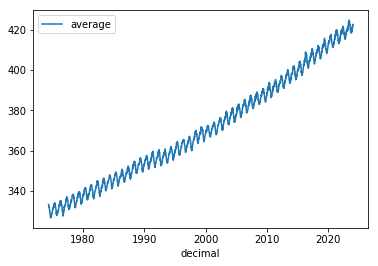

In [64]:
co2_clean.plot(x=["decimal"], y=["average"])

Separation des données en années.

In [73]:
year_min = co2_clean["year"].iloc[0]
year_max = co2_clean["year"].iloc[-1]